## Project Objective:

Using user data, 'takehome_users.csv', and user engagement data, 'takehome_user_engagement.csv', find the predictors of 'Adopted User'.

**'Adopted User'** is defined as one who has logged into the product on three separate days in at least one seven-day period.

In [1]:
# import relevant libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style = 'whitegrid', font_scale = 1.8)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# check the files encoding

import chardet    
rawdata = open('takehome_users.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

ISO-8859-1


- Load user data

In [3]:
df_1 = pd.read_csv('takehome_users.csv', encoding = 'ISO-8859-1')
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


- Load user engagement data

In [4]:
df_2 = pd.read_csv('takehome_user_engagement.csv', encoding = 'ISO-8859-1')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
# check df_1
df_1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
# check df_2
df_2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


### Process user engagement data to find the 'adopted users'.

In [7]:
# create new colum 'date' as datetime from 'time_stamp' in df_2
df_2['date'] = pd.to_datetime(df_2['time_stamp'])
df_2.head(20)

,time_stamp,user_id,visited,date
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04
5,2013-12-31 03:45:04,2,1,2013-12-31 03:45:04
6,2014-01-08 03:45:04,2,1,2014-01-08 03:45:04
7,2014-02-03 03:45:04,2,1,2014-02-03 03:45:04
8,2014-02-08 03:45:04,2,1,2014-02-08 03:45:04
9,2014-02-09 03:45:04,2,1,2014-02-09 03:45:04


In [8]:
# create new coulum 'delta_t_weeks'
df_2['delta_t_weeks'] = 0
df_2.head(20)

,time_stamp,user_id,visited,date,delta_t_weeks
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,0
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,0
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04,0
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04,0
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04,0
5,2013-12-31 03:45:04,2,1,2013-12-31 03:45:04,0
6,2014-01-08 03:45:04,2,1,2014-01-08 03:45:04,0
7,2014-02-03 03:45:04,2,1,2014-02-03 03:45:04,0
8,2014-02-08 03:45:04,2,1,2014-02-08 03:45:04,0
9,2014-02-09 03:45:04,2,1,2014-02-09 03:45:04,0


In [9]:
# get list of users who have logged at least 3 times in 7 days - 'adopted' users

lst_user = df_2['user_id'].value_counts().index
t_0 = 0
lst_user_a = []
log_max = 0

for user in lst_user:
    df_0 = df_2[df_2['user_id'] == user].copy()
    df_0.reset_index(drop = True, inplace = True)
    t_0 = df_0['date'].iloc[0]
    
    
    for i in range(len(df_0)):
        df_0['delta_t_weeks'].iloc[i] = (df_0['date'].iloc[i] - t_0).days // 7
        
    log_max = df_0['delta_t_weeks'].value_counts().values.max()
    
    if log_max >= 3:
        lst_user_a.append(user)

In [10]:
# print number of all users and of adopted users
print('All users: ', len(lst_user))
print('Adopted users: ', len(lst_user_a))

All users:  8823
Adopted users:  1472


In [11]:
# check for user_id = 1
1 in lst_user_a

False

In [12]:
# check for user_id = 2
2 in lst_user_a

True

In [13]:
# checks out

### Use list of 'adopted users' to separate user data in 'Adopted' and 'Non-Adopted' users.

In [14]:
mask_user_a = df_1['object_id'].isin(lst_user_a)

# adopted users
df_1a = df_1[mask_user_a].copy()
df_1a.reset_index(inplace = True, drop = True)

df_1a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   1472 non-null   int64  
 1   creation_time               1472 non-null   object 
 2   name                        1472 non-null   object 
 3   email                       1472 non-null   object 
 4   creation_source             1472 non-null   object 
 5   last_session_creation_time  1472 non-null   float64
 6   opted_in_to_mailing_list    1472 non-null   int64  
 7   enabled_for_marketing_drip  1472 non-null   int64  
 8   org_id                      1472 non-null   int64  
 9   invited_by_user_id          836 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 115.1+ KB


In [15]:
# non-adopted users
df_1b = df_1[~mask_user_a].copy()
df_1b.reset_index(inplace = True, drop = True)

df_1b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10528 entries, 0 to 10527
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   10528 non-null  int64  
 1   creation_time               10528 non-null  object 
 2   name                        10528 non-null  object 
 3   email                       10528 non-null  object 
 4   creation_source             10528 non-null  object 
 5   last_session_creation_time  7351 non-null   float64
 6   opted_in_to_mailing_list    10528 non-null  int64  
 7   enabled_for_marketing_drip  10528 non-null  int64  
 8   org_id                      10528 non-null  int64  
 9   invited_by_user_id          5581 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 822.6+ KB


In [16]:
# adopted users
df_1a.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
1,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0
2,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN
3,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN
4,43,2012-12-31 07:13:17,Gomes Beatrice,vgqmpljq@yyyxt.com,GUEST_INVITE,1.366010e+09,0,0,63,149.0


In [17]:
# non-adopted users
df_1b.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
2,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
3,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
4,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0


### Compare the composition of key features - 'creation_source', 'opted_in_to_mailing_list', and 'enabled_for_marketing_drip' - in 'Adopted' and 'Non-Adopted' users.

In [18]:
# define a function to plot the value count of a feature from a dataset

data_feat = 'creation_source'
data_name = 'Adopted Users' # data_name will be used as a legend in the plot
count_feat = 0
n_pts = 25 # number of values to plot from the value_count

fig_size_x = 12
fig_size_y = 10
legend_box_x = 1.0
legend_box_y = 0.1

x_max = 100
d_x = 10

# define function
def plot_feat_count(count_feat, data_feat, data_name, n_pts, fig_size_x, fig_size_y, x_max, d_x, legend_box_x, legend_box_y):
    
    plt.figure(figsize = (fig_size_x, fig_size_y))
    sns.barplot(x = count_feat.iloc[0:plt_pts].values, y = count_feat.iloc[0:plt_pts].index, palette = 'viridis', label = data_name)
    plt.xlim(0, x_max)
    plt.xticks(np.arange(0, x_max + d_x , d_x))
    plt.xlabel('Number of Users (%)')
    plt.title('Percentage of Number of Users vs. ' + data_feat.upper(), pad = 20)
    plt.legend(bbox_to_anchor = (legend_box_x, legend_box_y))
    plt.show()

- **Examine 'creation_source'**

In [19]:
# get and print feature value count for data_a

data = df_1a
data_feat = 'creation_source'
count_feat = data[data_feat].value_counts(normalize = True) * 100

print(count_feat)
print('\n')
print(data_feat + ' - total number of values: ', len(count_feat))

ORG_INVITE            34.239130
GUEST_INVITE          22.554348
SIGNUP                18.682065
SIGNUP_GOOGLE_AUTH    14.741848
PERSONAL_PROJECTS      9.782609
Name: creation_source, dtype: float64


creation_source - total number of values:  5


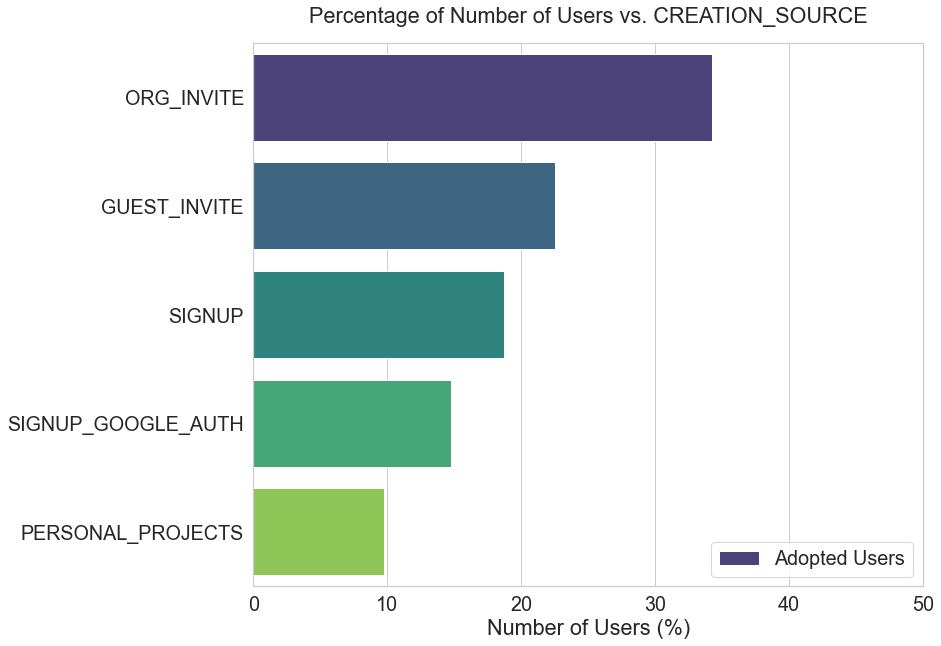

In [20]:
# plot

data_name = 'Adopted Users'
plt_pts = len(count_feat)
x_max = 50
d_x = 10
plot_feat_count(count_feat, data_feat, data_name, plt_pts, fig_size_x, fig_size_y, x_max, d_x, legend_box_x, legend_box_y)

In [21]:
# get and print feature value count for data_b

data = df_1b

count_feat = data[data_feat].value_counts(normalize = True) * 100

print(count_feat)
print('\n')
print(data_feat + ' - total number of values: ', len(count_feat))

ORG_INVITE            35.619301
PERSONAL_PROJECTS     18.683511
GUEST_INVITE          17.391717
SIGNUP                17.211246
SIGNUP_GOOGLE_AUTH    11.094225
Name: creation_source, dtype: float64


creation_source - total number of values:  5


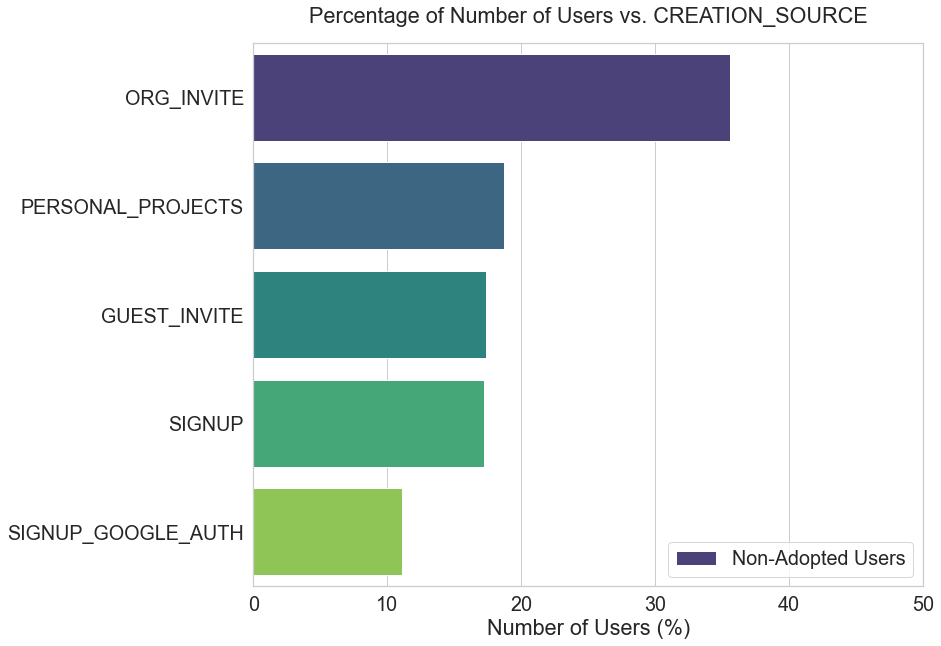

In [22]:
# plot

data_name = 'Non-Adopted Users'
plt_pts = len(count_feat)

plot_feat_count(count_feat, data_feat, data_name, plt_pts, fig_size_x, fig_size_y, x_max, d_x, legend_box_x, legend_box_y)

- **Examine 'opted_in_to_mailing_list'**

In [23]:
# get and print feature value count for data_a

data = df_1a
data_feat = 'opted_in_to_mailing_list'
count_feat = data[data_feat].value_counts(normalize = True) * 100

print(count_feat)
print('\n')
print(data_feat + ' - total number of values: ', len(count_feat))

0    73.845109
1    26.154891
Name: opted_in_to_mailing_list, dtype: float64


opted_in_to_mailing_list - total number of values:  2


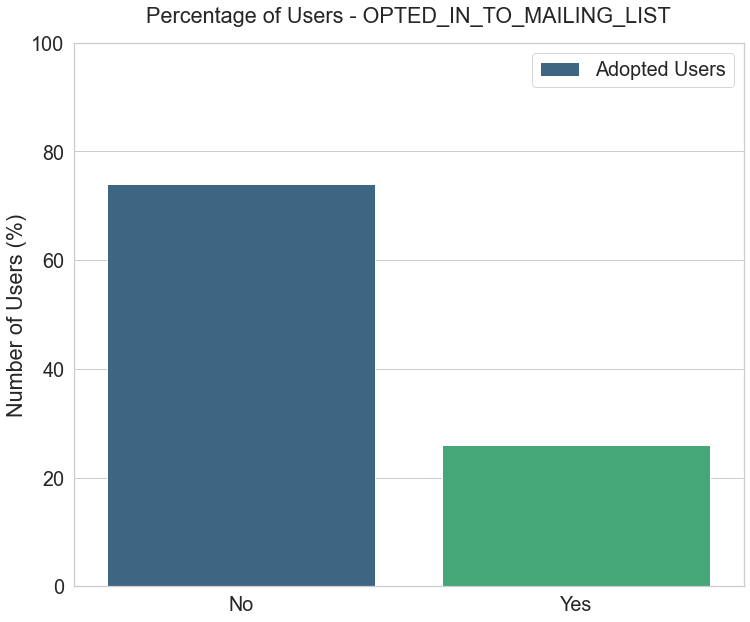

In [24]:
x_plt = ['No', 'Yes']
y_plt = [74, 26]

data_name = 'Adopted Users'

plt.figure(figsize = (fig_size_x, fig_size_y))
sns.barplot(x_plt, y_plt, palette = 'viridis', label = data_name)
plt.ylim(0, 100)
#plt.xticks(np.arange(0, x_max + d_x , d_x))
plt.ylabel('Number of Users (%)')
plt.title('Percentage of Users - ' + data_feat.upper(), pad = 20)
plt.legend()
plt.show()

In [25]:
# get and print feature value count for data_ab

data = df_1b

count_feat = data[data_feat].value_counts(normalize = True) * 100

print(count_feat)
print('\n')
print(data_feat + ' - total number of values: ', len(count_feat))

0    75.218465
1    24.781535
Name: opted_in_to_mailing_list, dtype: float64


opted_in_to_mailing_list - total number of values:  2


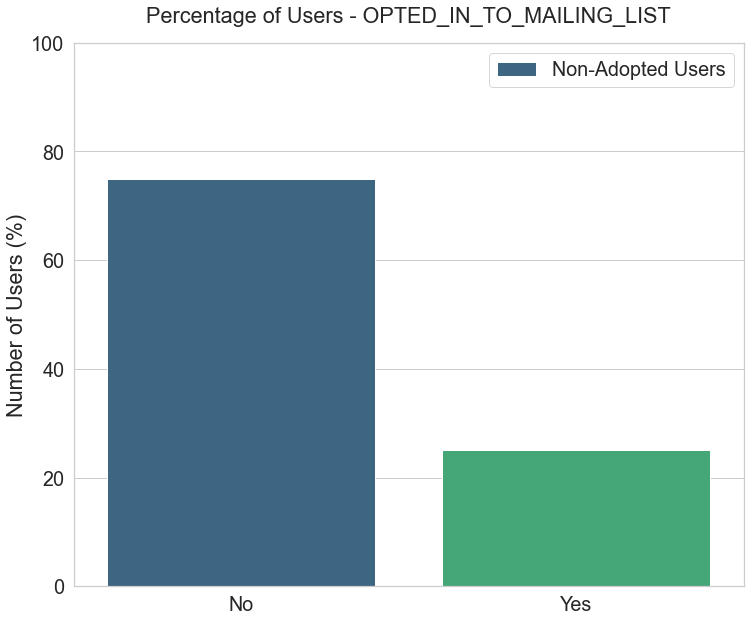

In [26]:
x_plt = ['No', 'Yes']
y_plt = [75, 25]

data_name = 'Non-Adopted Users'

plt.figure(figsize = (fig_size_x, fig_size_y))
sns.barplot(x_plt, y_plt, palette = 'viridis', label = data_name)
plt.ylim(0, 100)
#plt.xticks(np.arange(0, x_max + d_x , d_x))
plt.ylabel('Number of Users (%)')
plt.title('Percentage of Users - ' + data_feat.upper(), pad = 20)
plt.legend()
plt.show()

- **Examine 'enabled_for_marketing_drip'**

In [27]:
# get and print feature value count for data_a

data = df_1a
data_feat = 'enabled_for_marketing_drip'
count_feat = data[data_feat].value_counts(normalize = True) * 100

print(count_feat)
print('\n')
print(data_feat + ' - total number of values: ', len(count_feat))

0    84.578804
1    15.421196
Name: enabled_for_marketing_drip, dtype: float64


enabled_for_marketing_drip - total number of values:  2


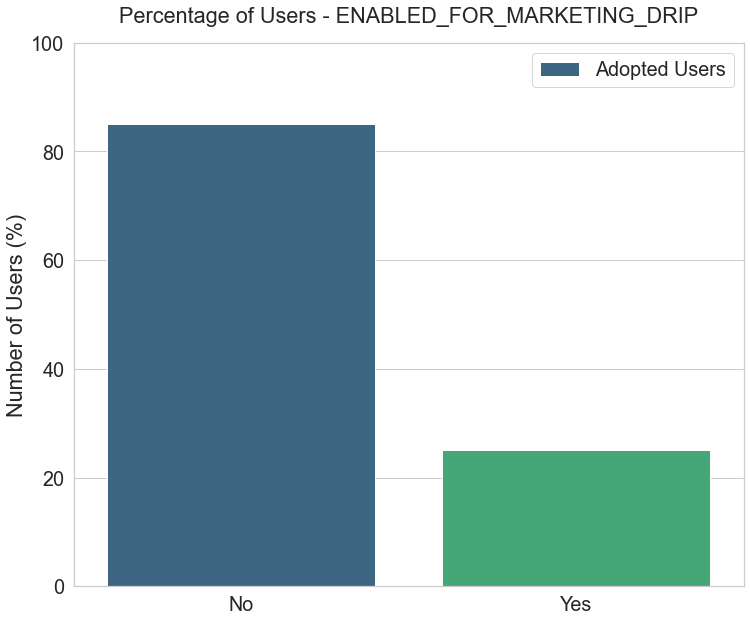

In [28]:
x_plt = ['No', 'Yes']
y_plt = [85, 25]

data_name = 'Adopted Users'

plt.figure(figsize = (fig_size_x, fig_size_y))
sns.barplot(x_plt, y_plt, palette = 'viridis', label = data_name)
plt.ylim(0, 100)
#plt.xticks(np.arange(0, x_max + d_x , d_x))
plt.ylabel('Number of Users (%)')
plt.title('Percentage of Users - ' + data_feat.upper(), pad = 20)
plt.legend()
plt.show()

In [29]:
# get and print feature value count for data_b

data = df_1b

count_feat = data[data_feat].value_counts(normalize = True) * 100

print(count_feat)
print('\n')
print(data_feat + ' - total number of values: ', len(count_feat))

0    85.134878
1    14.865122
Name: enabled_for_marketing_drip, dtype: float64


enabled_for_marketing_drip - total number of values:  2


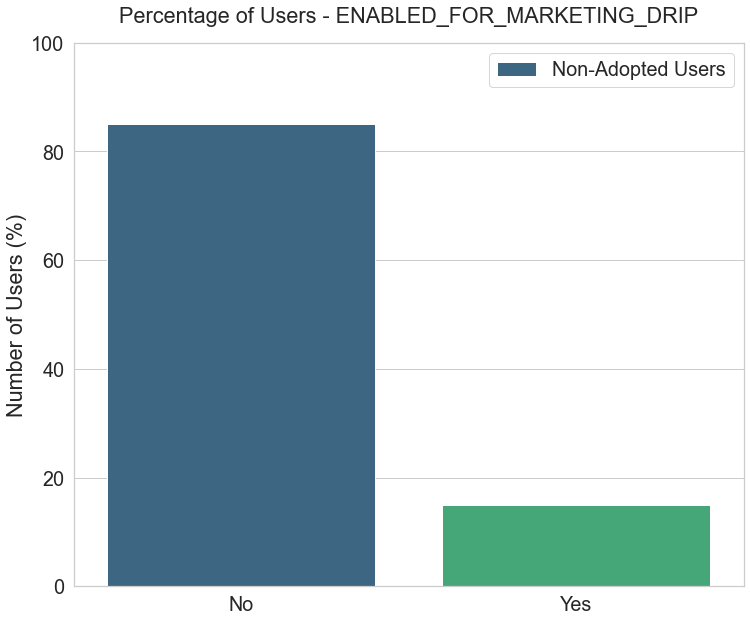

In [30]:
x_plt = ['No', 'Yes']
y_plt = [85, 15]

data_name = 'Non-Adopted Users'

plt.figure(figsize = (fig_size_x, fig_size_y))
sns.barplot(x_plt, y_plt, palette = 'viridis', label = data_name)
plt.ylim(0, 100)
#plt.xticks(np.arange(0, x_max + d_x , d_x))
plt.ylabel('Number of Users (%)')
plt.title('Percentage of Users - ' + data_feat.upper(), pad = 20)
plt.legend()
plt.show()

- **Examine 'org_id'**

In [31]:
# get and print feature value count for data_a

data = df_1a
data_feat = 'org_id'
count_feat = data[data_feat].value_counts(normalize = True) * 100

n_pts = 10

print(count_feat[0:n_pts])
print('\n')
print(data_feat + ' - total number of values: ', len(count_feat))

7     1.086957
2     0.951087
3     0.951087
4     0.951087
9     0.951087
1     0.883152
13    0.815217
0     0.747283
62    0.747283
5     0.679348
Name: org_id, dtype: float64


org_id - total number of values:  398


In [32]:
# get and print feature value count for data_a

data = df_1b

count_feat = data[data_feat].value_counts(normalize = True) * 100

print(count_feat[0:n_pts])
print('\n')
print(data_feat + ' - total number of values: ', len(count_feat))

0     2.925532
1     2.089666
2     1.776216
3     1.462766
4     1.377280
6     1.234802
5     1.120821
9     1.044833
7     0.978343
10    0.911854
Name: org_id, dtype: float64


org_id - total number of values:  417


## Findings:
From the features which were examined there are no true predictors for 'Adopted' vs. 'Non-Adopted' users.

There is a need for collecting more user data with new features in order to acomplish our obgective.